In [27]:
import json
import matplotlib.pyplot as plt
import os

In [6]:
DATAPATH = '../data/'

In [49]:
def load_data(file):
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
    return data

def export_data(data, file):
    with open(file, 'w') as f:
        f.write(json.dumps(data, indent=4))
    return

def load_reduced_data(file):
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
    rdata = data['summary']
    return rdata




In [60]:
def show_soh(data):
    plt.plot(data['cycle_index'], data['charge_capacity'])
    

In [ ]:
data = load_data(DATAPATH + 'FastCharge_000000_CH19_structure.json')
data['summary']['charge_capacity']

[1.4173516000000002,
 1.0456483,
 1.0484418,
 1.0478849000000001,
 1.0491858,
 1.0496510000000001,
 1.0494344999999998,
 1.049554,
 1.0495406,
 1.0491034,
 1.0492158999999999,
 1.0487296999999998,
 1.0488162,
 1.0487125,
 1.0486305,
 1.0473360999999999,
 1.0484591,
 1.0480546999999998,
 1.0484473,
 1.0482889000000002,
 1.0477306999999998,
 1.0479665999999999,
 1.0480314,
 1.0473388000000001,
 1.0473938,
 1.0473710999999999,
 1.0469800999999999,
 1.0471692,
 1.046802,
 1.0467125,
 1.0465540999999998,
 1.0459247999999999,
 1.0460625,
 1.0458695,
 1.0450327,
 1.045321,
 1.0449393,
 1.0447134,
 1.0451626,
 1.0448201,
 1.0445647,
 1.0448114,
 1.0447289,
 1.0443109,
 1.0443133,
 1.0438030999999999,
 1.0437651,
 1.0435630999999999,
 1.0429549,
 1.0430015,
 1.0429548,
 1.0425425,
 1.0427296,
 1.0425966,
 1.0417570999999999,
 1.0420194,
 1.0419048,
 1.0411416999999998,
 1.0412951,
 1.0407292,
 1.0406398000000001,
 1.0409076,
 1.0407624,
 1.0403239,
 1.0403118,
 1.0395763,
 1.0397491,
 1.0397539

FastCharge_000015_CH22_structure.json
FastCharge_000048_CH44_structure.json
FastCharge_000006_CH35_structure.json
FastCharge_000004_CH3_structure.json
paused FastCharge_000004_CH3_structure.json : 309
paused FastCharge_000004_CH3_structure.json : 998
FastCharge_000046_CH32_structure.json
FastCharge_000051_CH15_structure.json
paused FastCharge_000051_CH15_structure.json : 11
FastCharge_000024_CH45_structure.json
too much distance FastCharge_000024_CH45_structure.json : 245-246
FastCharge_000063_CH6_structure.json
FastCharge_000013_CH14_structure.json
paused FastCharge_000013_CH14_structure.json : 10
FastCharge_000050_CH40_structure.json
FastCharge_000012_CH21_structure.json
FastCharge_000005_CH18_structure.json
FastCharge_000030_CH30_structure.json
paused FastCharge_000030_CH30_structure.json : 246
FastCharge_000027_CH31_structure.json
paused FastCharge_000027_CH31_structure.json : 245
FastCharge_000001_CH38_structure.json
FastCharge_000017_CH1_structure.json
FastCharge_000012_CH45_stru

KeyboardInterrupt: 

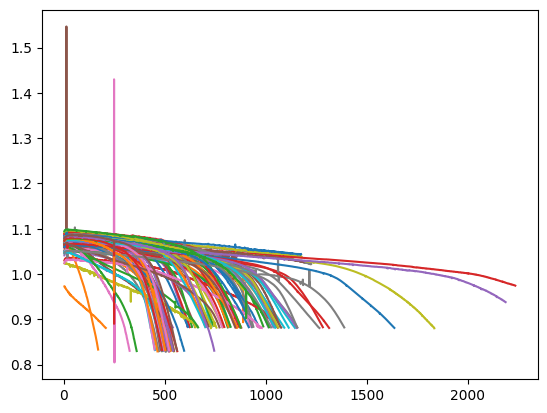

In [81]:
#the last datapoint seems off. We ignore it
CDATAPATH = 'clean_data' #reduced (in entries) and cleaned dataset
os.makedirs(CDATAPATH, exist_ok = True)


for file in os.listdir(DATAPATH):
    print(file)
    data = load_reduced_data(DATAPATH + file)
    for key in data.keys():
        data[key]=data[key][2:-2:]

    tolerance = 0.2
    for i in range(len(data['charge_capacity'])-1):
        if(data['charge_capacity'][i+1] - data['charge_capacity'][i] > tolerance):
            print(f"too much distance {file} : {i}-{i+1}")
    for i in range(len(data['charge_capacity'])-1):
        if(data['paused'][i] == 1):
            print(f"paused {file} : {i}")

    show_soh(data)


FastCharge_000015_CH22_structure.json
FastCharge_000048_CH44_structure.json
FastCharge_000006_CH35_structure.json
FastCharge_000004_CH3_structure.json
paused FastCharge_000004_CH3_structure.json : 309
paused FastCharge_000004_CH3_structure.json : 998
FastCharge_000046_CH32_structure.json
FastCharge_000051_CH15_structure.json
paused FastCharge_000051_CH15_structure.json : 11
FastCharge_000024_CH45_structure.json
too much distance FastCharge_000024_CH45_structure.json : 245-246
FastCharge_000063_CH6_structure.json
FastCharge_000013_CH14_structure.json
paused FastCharge_000013_CH14_structure.json : 10
FastCharge_000050_CH40_structure.json


KeyboardInterrupt: 

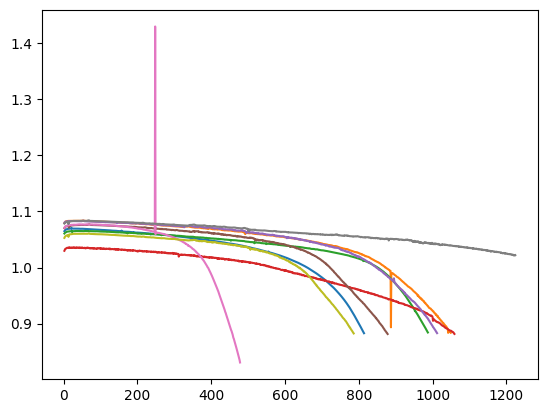

In [86]:
for file in os.listdir(DATAPATH):
    print(file)
    data = load_reduced_data(DATAPATH + file)
    for key in data.keys():
        data[key] = data[key][2:-2:]

    nominal_capacity = max(data['charge_capacity'][:5])
    data['state_of_health'] = [cc / nominal_capacity for cc in data['charge_capacity']]

    tolerance = 0.2
    for i in range(len(data['charge_capacity']) - 1):
        if data['charge_capacity'][i + 1] - data['charge_capacity'][i] > tolerance:
            print(f"too much distance {file} : {i}-{i + 1}")
    for i in range(len(data['charge_capacity']) - 1):
        if data['paused'][i] == 1:
            print(f"paused {file} : {i}")

    show_soh(data)


### Models


In [78]:
[k for k in data.keys()]

['cycle_index',
 'discharge_capacity',
 'charge_capacity',
 'discharge_energy',
 'charge_energy',
 'dc_internal_resistance',
 'temperature_maximum',
 'temperature_average',
 'temperature_minimum',
 'date_time_iso',
 'energy_efficiency',
 'charge_throughput',
 'energy_throughput',
 'charge_duration',
 'time_temperature_integrated',
 'paused']

In [85]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

list_columns_kept = [['discharge_capacity', #eliminated paused, and data_time_iso: most likely useless
                    'charge_capacity',
                    'discharge_energy',
                    'charge_energy',
                    'dc_internal_resistance',
                    'temperature_maximum',
                    'temperature_average',
                    'temperature_minimum',
                    'energy_efficiency',
                    'charge_throughput',
                    'energy_throughput',
                    'charge_duration',
                    'time_temperature_integrated']]
num_columns_kept = len(list_columns_kept)

class TemporalDataset(Dataset):
    def __init__(self, data):
        self.features = torch.tensor(data[list_columns_kept].values, dtype=torch.float32)
        self.targets = torch.tensor(data['state_of_health'].values, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

#LSTM parameters
sequence_length = 10
hidden_size = 64
num_layers = 2
batch_size = 32
learning_rate = 0.001
num_epochs = 50

dataset = TemporalDataset(data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
model = LSTMModel(input_size=num_columns_kept, hidden_size=hidden_size, num_layers=num_layers, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for features, targets in data_loader:
        features = features.view(-1, sequence_length, 13)
        targets = targets.view(-1, 1)
        outputs = model(features)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

print('Training complete')


TypeError: 'ellipsis' object is not subscriptable

In [88]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

class TemporalDataset(Dataset):
    def __init__(self, data, sequence_length):
        self.features = torch.tensor(data.iloc[:, :-1].values, dtype=torch.float32)
        self.targets = torch.tensor(data['state_of_health'].values, dtype=torch.float32)
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.features) - self.sequence_length + 1

    def __getitem__(self, idx):
        x = self.features[idx:idx + self.sequence_length]
        y = self.targets[idx + self.sequence_length - 1]
        return x, y

all_data = []

for file in os.listdir(DATAPATH):
    data = load_reduced_data(DATAPATH + file)
    for key in data.keys():
        data[key] = data[key][2:-2:]
    nominal_capacity = max(data['charge_capacity'][:5])
    data['state_of_health'] = [cc / nominal_capacity for cc in data['charge_capacity']]
    df = pd.DataFrame(data)
    all_data.append(df)

unified_data = pd.concat(all_data, ignore_index=True)

list_columns_kept = [
    'discharge_capacity', 
    'charge_capacity',
    'discharge_energy',
    'charge_energy',
    'dc_internal_resistance',
    'temperature_maximum',
    'temperature_average',
    'temperature_minimum',
    'energy_efficiency',
    'charge_throughput',
    'energy_throughput',
    'charge_duration',
    'time_temperature_integrated'
]

unified_data = unified_data[list_columns_kept + ['state_of_health']]

sequence_length = 10
batch_size = 32

dataset = TemporalDataset(unified_data, sequence_length)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


ValueError: max() arg is an empty sequence